### Problem Statement

To deploy a machine learning model that accurately predicts genetic disorders and subclasses in children based on medical information. This aims to increase awareness and utilization of genetic testing, leading to early detection, informed decision-making during pregnancy, and improved healthcare outcomes.

#### Independent variables

Patient Id, Patient Age, Genes in mother's side, Inherited from father, Maternal gene, Paternal gene, Blood cell count (mcL), Mother's age, Father's age, Status, Respiratory Rate (breaths/min), Heart Rate(rates/min), Follow-up, Gender, Birth asphyxia, Autopsy shows birth defect (if applicable), Place of birth, Folic acid details (peri-conceptional), H/O serious maternal illness, H/O radiation exposure (x-ray), H/O substance abuse, Assisted conception IVF/ART, History of anomalies in previous pregnancies, No. of previous abortion, Birth defects, White Blood cell count (thousand per microliter), Blood test result, Symptom 1, Symptom 2, Symptom 3, Symptom 4, Symptom 5

#### Target variable 

Disorder Subclass

#### Detailed information about the independent and target variables are as follows:Out of the total 45 independent variables 16 are numerical in type and rest are of categorical type

| **Feature Name**                                | **Type**        | **Description**                                     |
|------------------------------------------------:|:--------------:|----------------------------------------------------:|
| Patient ID                                     | Numeric        | Represents the unique identification number of a patient |
| Patient Age                                    | Numeric        | Age of a patient |
| Genes in mother’s side                         | Numeric        | A gene defect in a patient's mother |
| Inherited from father                          | Numeric        | A gene defect in a patient's father |
| Maternal Gene                                  | Numeric        | Represents a gene defect in the patient's maternal side of the family |
| Paternal Gene                                  | Numeric        | Represents a gene defect in the patient's paternal side of the family |
| Blood cell count (mcL)                         | Numeric        | Blood cell count of patient |
| Family Name                                    | Categorical    | Represents the family name or surname |
| Father’s Name                                  | Categorical    | Represents Father’s name of patient |
| Mother’s Age                                   | Numeric        | Represents mother’s age of patient |
| Father’s Age                                   | Numeric        | Represents father’s age of patient |
| Institute Name                                 | Categorical    | Represents the medical institute where a patient was born |
| Location of the Institute                      | Categorical    | Represents the location of the medical institute |
| Status                                        | Categorical    | Represents whether a patient is deceased |
| Respiratory Rate (breaths/min)                 | Categorical    | Represents a patient's respiratory breathing rate |
| Heart Rate (rates/min)                         | Categorical    | Represents patient’s heart rate |
| Test1 - Test5                                  | Categorical    | Represents different tests that were conducted on a patient |
| Parental consent                               | Categorical    | Represents whether a patient's parents approved the treatment plan |
| Follow Up                                     | Categorical    | Represents a patient's level of risk |
| Gender                                        | Categorical    | Represents patient’s gender |
| Birth Asphyxia                                | Categorical    | Represents whether a patient suffered from birth asphyxia |
| Autopsy shows Birth defects (if applicable)   | Categorical    | Represents whether a patient's autopsy showed any birth defects |
| Place of Birth                                | Categorical    | Represents whether a patient was born in a medical institute or home |
| Folic Acid (peri-conceptual)                  | Categorical    | Represents the peri-conceptional folic acid supplementation details of a patient |
| H/O serious maternal illness                  | Categorical    | Represents an unexpected outcome of labor and delivery that resulted in significant short or long-term consequences to a patient's mother |
| H/O radiation exposure (x-ray)                | Categorical    | Represents whether a patient has any radiation exposure history |
| H/O Substance abuse                           | Categorical    | Represents whether a parent has a history of drug addiction |
| Assisted conception IVF/ART                   | Categorical    | Represents the type of treatment used for infertility |
| History of anomalies in previous pregnancies  | Categorical    | Represents whether the mother has any previous anomalies in pregnancies |
| No. Previous abortions                        | Numeric        | Represents the number of abortions that a mother had |
| Birth Defects                                 | Categorical    | Represents whether the patient has any birth defects |
| White Blood cell count(1000/microliter)       | Numeric        | Represents the patient’s WBC counts |
| Blood test result                             | Categorical    | Represents the patient’s blood test results |
| Symptom 1 - Symptom 5                         | Numeric        | Represents (masked) different types of symptoms that a patient had |
| Genetic Disorder                              | Categorical    | Represents the genetic disorder that a patient has |


#### Importing Required libraries

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency,kruskal 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score,roc_auc_score,roc_curve
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression

### datasset link:
https://www.kaggle.com/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge/data

Selected Train.csv as dataset

**Reading the file**

In [251]:
pd.set_option('display.max_columns', None)

In [253]:

df=pd.read_csv("train.csv",index_col='Patient Id')
df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
Patient Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [255]:
df=df.drop('Genetic Disorder',axis=1)

# Data Analysis

In [257]:
df.shape

(22083, 43)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22083 entries, PID0x6418 to PID0x9332
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Patient First Name                                22083 non-null  object 
 7   Family Name                                       12392 non-null  object 
 8   Father's name                                     22083 non-null  object 
 9   Mother's a

-- Inference:
- 1)The dataset has  22083 entries with 44 columns.
- 2)The data is present in float and object dtype.
- 3)The dataset has 16 float type columns and 28 object types columns.
- 4)Presence of large number of Missing values.

In [261]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Patient First Name', 'Family Name', 'Father's name', 'Mother's age',
       'Father's age', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
   

- We have columns like 'Patient First Name', 'Family Name',"Father's name",'Institute Name','Location of Institute','Place of birth' which are not useful for analysis.

In [263]:
df.drop(['Patient First Name', 'Family Name',"Father's name",'Institute Name','Location of Institute','Place of birth'],axis=1,inplace=True)

***Numeric columns analysis***

In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient Age,20656.0,6.974148,4.319475,0.000000,3.000000,7.000000,11.000000,14.000000
Blood cell count (mcL),22083.0,4.898871,0.199663,4.092727,4.763109,4.899399,5.033830,5.609829
Mother's age,16047.0,34.526454,9.852598,18.000000,26.000000,35.000000,43.000000,51.000000
Father's age,16097.0,41.972852,13.035501,20.000000,31.000000,42.000000,53.000000,64.000000
Test 1,19956.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 2,19931.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 3,19936.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 4,19943.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test 5,19913.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
No. of previous abortion,19921.0,2.003062,1.411919,0.000000,1.000000,2.000000,3.000000,4.000000


In [267]:
for col in df.select_dtypes(np.number).columns:
    print(df[col].value_counts())
    print("_____________________________________________")

4.0     1435
12.0    1435
9.0     1415
2.0     1396
5.0     1394
0.0     1386
13.0    1384
3.0     1383
6.0     1374
1.0     1364
11.0    1353
7.0     1351
8.0     1340
14.0    1333
10.0    1313
Name: Patient Age, dtype: int64
_____________________________________________
4.760603    1
4.800413    1
4.874316    1
4.592124    1
5.190047    1
4.865799    1
4.862593    1
5.123729    1
4.794802    1
5.014977    1
4.926714    1
4.801026    1
4.929843    1
5.190259    1
5.104004    1
4.855616    1
5.022932    1
4.957544    1
4.472731    1
5.089607    1
5.574097    1
4.949956    1
4.831997    1
4.779547    1
4.643682    1
4.641068    1
5.014455    1
4.751267    1
4.506074    1
5.395993    1
4.985519    1
5.069414    1
5.006081    1
5.126509    1
5.136476    1
5.140776    1
4.815130    1
4.850726    1
4.847703    1
5.127216    1
4.643259    1
4.920964    1
4.742319    1
4.825284    1
4.907656    1
5.036214    1
4.907659    1
4.795059    1
4.784124    1
4.907220    1
4.942470    1
4.984307    1

3.000000     1333
12.000000    1327
9.857562        1
10.786022       1
7.808230        1
11.403606       1
7.729957        1
5.562296        1
5.917510        1
4.473255        1
8.942236        1
5.464237        1
9.739904        1
5.541228        1
11.611855       1
11.502467       1
8.951022        1
5.838731        1
9.644238        1
3.387962        1
9.067686        1
5.531915        1
6.754354        1
6.146695        1
9.504600        1
11.048624       1
3.965983        1
3.823217        1
9.405113        1
9.158357        1
6.934051        1
5.682599        1
6.102290        1
11.530464       1
5.813856        1
8.427383        1
6.337137        1
4.107685        1
11.721141       1
5.395323        1
4.670060        1
4.104163        1
8.190248        1
6.698299        1
3.951519        1
3.153841        1
9.719194        1
9.327680        1
5.363500        1
10.065819       1
4.759129        1
4.944075        1
8.460778        1
5.510509        1
7.513027        1
11.620730 

- Here test1,test2,test3,test4 are having only one class which will not give us any kind of information.So,we have remove it.
- Symptom1,Symptom2,Symtom3,Symptom4,Symptom5 has only two class.It needs to change its dtype to object

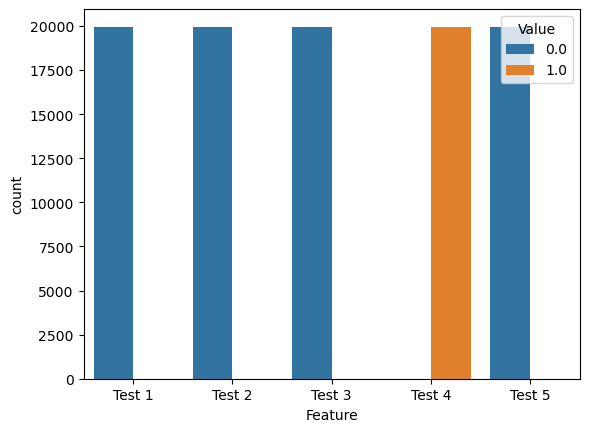

In [269]:
x1=df[['Test 1','Test 2','Test 3','Test 4','Test 5']]
df3 = pd.DataFrame(x1)
df_melted = df3.melt(value_vars=df3.columns, var_name='Feature', value_name='Value')
sns.countplot(x='Feature', hue='Value', data=df_melted)
plt.show()


In [ ]:
df_melted

In [ ]:
df.drop(['Test 1','Test 2','Test 3','Test 4','Test 5'],axis=1,inplace=True)

In [ ]:
x2=df[['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']]
df4 = pd.DataFrame(x2)
df_melted = df4.melt(value_vars=df4.columns, var_name='Feature', value_name='Value')
sns.countplot(x='Feature', hue='Value', data=df_melted)
plt.show()

In [ ]:
sym=['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']
for i in sym:
    df[i]=df[i].astype('object')

In [ ]:
#Visual

In [ ]:
for col in df.select_dtypes(np.number).columns:
    print("Skewness: ",df[col].skew())
    print("Kurtosis: ",df[col].kurt())
    sns.displot(x=df[col],kde=True)
    plt.show()
    print("_____________________________________________")

**Category Column Analysis**

In [ ]:
df.describe(exclude=np.number).T

In [ ]:
for col in df.select_dtypes(exclude=np.number).columns:
    print(df[col].value_counts())
    print("_____________________________________________")

- Inference:
- Mostly all columns has three classes 'Yes','No' or 'Not available'.
- 'Parental consent' has only one class which has no information .So,we can drop it.
- Some columns has misclassified class.Which needs correction.

In [ ]:
df.drop('Parental consent',axis=1,inplace=True)

In [ ]:
df['Respiratory Rate (breaths/min)']=df['Respiratory Rate (breaths/min)'].replace({'Normal (30-60)':'Normal'})

In [ ]:
df['Birth asphyxia']=df['Birth asphyxia'].replace({'Not available':"No record"})

In [ ]:
df['Autopsy shows birth defect (if applicable)']=df['Autopsy shows birth defect (if applicable)'].replace({'None':'Not applicable'})

In [ ]:
df['H/O radiation exposure (x-ray)']=df['H/O radiation exposure (x-ray)'].replace({'-':np.nan})

In [ ]:
df['H/O substance abuse']=df['H/O substance abuse'].replace({'-':np.nan})

In [ ]:
for col in df.select_dtypes(exclude=np.number).columns:
    sns.countplot(x=df[col])
    plt.xticks(rotation=90)
    plt.show()
    print("_____________________________________________________________________________")

**Target Column Analysis**

In [ ]:
df['Disorder Subclass'].value_counts()

In [ ]:
sns.countplot(x=df['Disorder Subclass'])
plt.xticks(rotation=90)
plt.show()

- We have 9 different genetic disorders subclass with different count.But since,for each disorder subclass we donot has enough columns to learn.We will select the top 4 disorder subclasses with respect to our analysis.

In [ ]:
df['Disorder Subclass'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
Top_4=df['Disorder Subclass'].value_counts().sort_values(ascending=False).head(4)
Top_4.plot(kind='bar')

- Rest of the subclasses we will remove

In [ ]:
df=df[~((df['Disorder Subclass']=="Leber's hereditary optic neuropathy")|\
        (df['Disorder Subclass']=="Alzheimer's")|\
            (df['Disorder Subclass']=="Cancer")|\
                (df['Disorder Subclass']=="Diabetes")|\
                    (df['Disorder Subclass']=="Hemochromatosis"))]



# Data-Preprocessing

**Missing value Treatment**

In [ ]:
df.isnull().sum()

- Inference:
    -- We have large number of Missing values.


- Course of Action:
- Since,this is a Healthcare dataset.We cannot impute the missing values with central tendencies as it will hinder the interpretation.For this we will use Statistical tests to see which column is affection by which other column and do the imputation.
- First, we will see which columns are significantly affecting the target.For those we will use statistical methods for missing value imputation.
- for non significant column with respect to target.We will use Central tendency imputation

In [ ]:
pd.set_option('display.max_row', None)
(df.isnull().sum()/df.shape[0])*100

**Missing value treatment for 'Disorder Subclass'**

- We cannot do imputation in the target column so we are directly removing the rows where there is a null value in target column.

In [ ]:
# drop rows where target features are not available
df.dropna(subset=['Disorder Subclass'], how='any', inplace=True)
df.shape

**Categorical columns significantly affecting the target('Disorder Subclass')**

In [ ]:
p_v=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df['Disorder Subclass'], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    p_v.append(round(p,2))
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("--------------------------------------------------------------------")
    

In [ ]:
p_value_cat=pd.DataFrame()
p_value_cat['Features']=df.select_dtypes(exclude=np.number).columns
p_value_cat['p_values']=p_v


In [ ]:
p_value_cat.sort_values(by='p_values',ascending=True)


- if p_val>0.05:
    return "Non-significant"
  elif p_val<0.05:
    return 'SIgnificant'
- So,"Genes in mother's side","Symptom-1,2,3,4,5" , 'Inherited from father','Maternal gene','Paternal gene','Birth defects' are significant with respect to the 'Target'.

**Numerical columns significantly affecting the target**

In [ ]:
(df.isnull().sum()/df.shape[0])*100

In [ ]:
df_n = df.dropna()

In [ ]:
df_n['Disorder Subclass'].value_counts()

In [ ]:
p_val=[]
for i in df_n.select_dtypes(include=np.number):
    print(i)
    result = kruskal(df_n[i][df_n['Disorder Subclass']=="Cystic fibrosis"],
                    df_n[i][df_n['Disorder Subclass']=="Leigh syndrome"],
                    df_n[i][df_n['Disorder Subclass']=="Mitochondrial myopathy"],
                    df_n[i][df_n['Disorder Subclass']=="Tay-Sachs"])

    p_value = result.pvalue
    p_val.append(round(p_value,2))
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
        print('pvalue:', result)
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
        print('pvalue:', result)

In [ ]:
p_value_num=pd.DataFrame()
p_value_num['Features']=df.select_dtypes(include=np.number).columns
p_value_num['p_values']=p_val


In [ ]:
p_value_num.sort_values(by='p_values',ascending=True)

- No,Numeric column is significant to the target 'Disorder Subclass'

**## Statistical Method of Missing values Imputation for significant columns                   ("Genes in mother's side","Symptom-1,2,3,4,5" , 'Inherited from father','Maternal gene','Paternal gene','Birth defects' are significant with respect to the 'Target'.)**

- 'Genes in Mother's side' and 'Paternal gene' doesnot have any missing values

**Filling missing values in Maternal gene**

- Checking for the column which affects the 'Maternal gene' the most using statistical method.

In [ ]:
#Categorical column affecting the 'Maternal gene'

In [ ]:
p_mat=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df['Maternal gene'], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_mat.append(round(p,2))
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("--------------------------------------------------------------------")
    

In [ ]:
p_value_mat=pd.DataFrame()
p_value_mat['Features']=df.select_dtypes(exclude=np.number).columns
p_value_mat['p_values']=p_mat

In [ ]:
p_value_mat.sort_values(by='p_values',ascending=True)

- When we see p-values of numeric columns and categorical columns, the columns "Genes in mother's side" ,"Disorder subclass" and'Symptoms' are affecting the 'Maternal gene' the most. 

In [ ]:
pd.crosstab(df['Maternal gene'], df["Genes in mother's side"])

In [ ]:
pd.crosstab(df['Maternal gene'], df["Genes in mother's side"]).plot(kind='bar')

In [ ]:
pd.crosstab(df['Maternal gene'], df["Disorder Subclass"])

In [ ]:
pd.crosstab(df['Maternal gene'], df["Disorder Subclass"]).plot(kind='bar')

In [ ]:
list=['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']
for col in list:
    print(pd.crosstab(col,df['Maternal gene']))
    pd.crosstab(col,df['Maternal gene']).plot(kind='bar')
    plt.show()

- Since.'Disorder subclass' is giving much clear information.Using 'Disorder subclass' for imputing missing values in 'Maternal gene'.

In [ ]:
conditions = [
    df["Disorder Subclass"] == "Cystic fibrosis",
    df["Disorder Subclass"] == "Leigh syndrome",
    df["Disorder Subclass"] == "Mitochondrial myopathy",
    df["Disorder Subclass"] == "Tay-Sachs"
]

values = ['Yes', 'Yes', 'No','No']

df["Maternal gene"] = df["Maternal gene"].fillna(pd.Series(np.select(conditions, values, default=None), index=df.index))


In [ ]:
df['Maternal gene'].isnull().sum()

In [ ]:
# NUMERIC FEATURES affecting the Maternal gene

In [ ]:
p_mat_n=[]
for i in df.select_dtypes(include=np.number):
    print(i)
    result = stats.mannwhitneyu(df[i][df["Maternal gene"]=="Yes"].dropna(),
                     df[i][df["Maternal gene"]=="No"].dropna())
                     

    p_value = result.pvalue
    p_mat_n.append(p_value)
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")


In [ ]:
p_value_mat_n=pd.DataFrame()
p_value_mat_n['Features']=df.select_dtypes(include=np.number).columns
p_value_mat_n['p_values']=p_mat_n

In [ ]:
p_value_mat_n.sort_values(by='p_values',ascending=True)

**Filling Missing values in "Inherited from father" columns**

In [ ]:
# categorical column affecting 'Inherited from father'

In [ ]:
p_father=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df["Inherited from father"], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_father.append(round(p,2))
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("--------------------------------------------------------------------")
    

In [ ]:
p_value_father=pd.DataFrame()
p_value_father['Features']=df.select_dtypes(exclude=np.number).columns
p_value_father['p_values']=p_father

In [ ]:
p_value_father.sort_values(by='p_values',ascending=True)

- 'Disorder subclass','Petarnal' and 'Symptoms' are affecting 'Inherited from father' the most.

In [ ]:
pd.crosstab(df["Inherited from father"], df["Disorder Subclass"])

- All are having 'Inherited from father' as 'No' for each disorder subclass

In [ ]:
pd.crosstab(df["Inherited from father"], df["Disorder Subclass"]).plot(kind='bar')

In [ ]:
pd.crosstab(df["Inherited from father"], df["Paternal gene"])

In [ ]:
pd.crosstab(df["Inherited from father"], df["Paternal gene"]).plot(kind='bar')

- Even with respect to Paternal gene.It is giving 'No' in majority

In [ ]:
list=['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']
for col in list:
    print(pd.crosstab(col,df['Inherited from father']))
    pd.crosstab(col,df['Inherited from father']).plot(kind='bar')
    plt.show()

- 'No' is in Majority irrespective to any disorder suclass.

- Since,irerespective of any disorder subclass 'Inherited from father' is coming negative.Hence,we impute 'No' in all the missing values.

In [ ]:

df["Inherited from father"] = df["Inherited from father"].fillna('No')

In [ ]:
df["Inherited from father"].isnull().sum()

**Filling Missing values in "Blood test result"  column**

In [ ]:
df["Blood test result"].value_counts()

In [ ]:
#Numeric values affecting 'Blood test result'

In [ ]:
p_bloodtest_n=[]
for i in df.select_dtypes(include=np.number):
    print(i)
    result = kruskal(df[i][df["Blood test result"]=="slightly abnormal"].dropna(),
                     df[i][df["Blood test result"]=="inconclusive"].dropna(),
                     df[i][df["Blood test result"]=="normal"].dropna(),
                    df[i][df["Blood test result"]=="abnormal"].dropna())
                     

    p_value = result.pvalue
    p_bloodtest_n.append(p_value)
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")


In [ ]:
p_val_bloodtest_n=pd.DataFrame()
p_val_bloodtest_n['Features']=df.select_dtypes(include=np.number).columns
p_val_bloodtest_n['p_values']=p_bloodtest_n

In [ ]:
p_val_bloodtest_n.sort_values(by='p_values',ascending=True)

In [ ]:
# Categorical column affecting "Blood test result"

In [ ]:
p_bloodtest=[]
for i in df.select_dtypes(exclude=np.number):
    print(i)

    contingency_table = pd.crosstab(df["Blood test result"], df[i])

    # Chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_bloodtest.append(round(p,2))
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")
    print("--------------------------------------------------------------------")
    

In [ ]:
p_value_bloodtest_cat=pd.DataFrame()
p_value_bloodtest_cat['Features']=df.select_dtypes(exclude=np.number).columns
p_value_bloodtest_cat['p_values']=p_bloodtest

In [ ]:
p_value_bloodtest_cat.sort_values(by='p_values',ascending=True)

"Symptom 1","Symptom 4",'Disorder Subclass','Birth defects' and 'History of anomalies in previous pregnancies' are affecting the most

- Among all 'Symptom4' is significantly affecting 'Blood_test_result

In [ ]:
pd.crosstab(df['Symptom 4'],df['Blood test result'])

In [ ]:
pd.crosstab(df['Symptom 4'],df['Blood test result']).plot(kind='bar')

In [ ]:
pd.crosstab(df['Birth defects'],df['Blood test result'])

In [ ]:
pd.crosstab(df['Birth defects'],df['Blood test result']).plot(kind='bar')

- For both "Birth defects" and "Symptom 4",irrespective of "Blood test results",it is giving "slightly abnormal".

In [ ]:

df["Blood test result"] = df["Blood test result"].fillna("slightly abnormal")


In [ ]:
df['Blood test result'].isnull().sum()

**Missing Missing values of Insignificant Columns w.r.t Target using Central tendencies**

In [ ]:
#Numerical
for col in df.select_dtypes(np.number).columns:
    df[col]=df[col].fillna(df[col].mean())

In [ ]:
df['Symptom 1'].dtype

In [ ]:
#Categorical
df_cat=df.drop(["Genes in mother's side",'Inherited from father','Maternal gene', 'Paternal gene','Blood test result',
       'Disorder Subclass'],axis=1)
for col in df_cat.select_dtypes(exclude=np.number).columns:
    df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
df.dtypes

In [ ]:
l=['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']
for sym in l:
    df[sym]=df[sym].astype('object')

# Outliers Treatment

In [ ]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])
    plt.show()

- We have missing values in only "Blood cell count(mcL)" but that is not too extreme.So,we can ignore.

# Encoding

- We are using One-hot encoding so that equal importance can be given for each subcategory.

In [ ]:
df1=pd.get_dummies(df,drop_first=True)

In [ ]:
df1.head()

In [ ]:
df1.columns

# Scaling

In [ ]:

for column in df1.select_dtypes(include=np.number).columns:
    scaler = RobustScaler()
    df1[column] = scaler.fit_transform(df1[[column]])

data_sc = pd.DataFrame(df1, columns=df1.columns)

In [ ]:
data_sc.head()

# Base Model Building

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data_sc.columns

In [ ]:
def metrics(ytest,ypred):
    print("The Accuracy_score: ",accuracy_score(ytest,ypred))
    print("The precision_score: ",precision_score(ytest,ypred))
    print("The recall_score: ",recall_score(ytest,ypred))
    print("The f1 score : ",f1_score(ytest,ypred))
    print("The Classification_report : ")
    print(classification_report(ytest,ypred))
    print("The roc_auc_score: ",roc_auc_score(ytest,ypred))
    fpr,tpr,thre=roc_curve(ytest,ypred)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='red')
    plt.show()

**Target with all the features and all 3 disorder subclasses**

**@'Disorder Subclass_Leigh syndrome' as a target column**

In [ ]:
df2=data_sc.drop(['Disorder Subclass_Mitochondrial myopathy','Disorder Subclass_Tay-Sachs'],axis=1)
X=df2.drop('Disorder Subclass_Leigh syndrome',axis=1)
y=df2[['Disorder Subclass_Leigh syndrome']]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
xtrain_c=sm.add_constant(xtrain)
lr=LogisticRegression()
base_model1=lr.fit(xtrain,ytrain)
ypred=base_model1.predict(xtest)

In [ ]:
metrics(ytest,ypred)

- Inference:
- 'precision','recall' and 'f1_Score' for '1' is coming to be 0.
- 'precision','recall' and 'f1_Score' for '0' is coming to the range 0.67-1.00.
- The roc_curve of the model is lieing exactly on the diagonal.
- Proving that it is a worst Model.

**@  'Disorder Subclass_Mitochondrial myopathy' as a Target column**

In [ ]:
df2=data_sc.drop(['Disorder Subclass_Leigh syndrome','Disorder Subclass_Tay-Sachs'],axis=1)
X=df2.drop('Disorder Subclass_Mitochondrial myopathy',axis=1)
y=df2[['Disorder Subclass_Mitochondrial myopathy']]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
xtrain_c=sm.add_constant(xtrain)
lr=LogisticRegression()
base_model1=lr.fit(xtrain,ytrain)
ypred=base_model1.predict(xtest)

In [ ]:
metrics(ytest,ypred)

- Inference:
- The 'Recall','Precision','f1-score' of 0 is in the range between 0.73-0.95.
- The 'Recall','Precision','f1-score' of 1 is in the range 0.08-0.36.
- roc_curve is lying almost on the diagonal.Represent the outcome as a by-chance result.
- This is also a worst model.

**@ 'Disorder Subclass_Tay-Sachs' as a Target column**

In [ ]:
df2=data_sc.drop(['Disorder Subclass_Leigh syndrome','Disorder Subclass_Mitochondrial myopathy'],axis=1)
X=df2.drop('Disorder Subclass_Tay-Sachs',axis=1)
y=df2[['Disorder Subclass_Tay-Sachs']]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
xtrain_c=sm.add_constant(xtrain)
lr=LogisticRegression()
base_model1=lr.fit(xtrain,ytrain)
ypred=base_model1.predict(xtest)

In [ ]:
metrics(ytest,ypred)

- Inference:
- The 'Recall','Precision','f1-score' of 0 is in the range between 0.86-0.96.
- The 'Recall','Precision','f1-score' of 1 is in the range 0.30-0.60.
- roc_curve is lying almost on the diagonal.Represent the outcome as a by-chance result.
- This is also a worst model.

- Since,the performance is very very less.We will include only significant columns.

**Decision Tree (Without Hyperparameter Tuning)**

In [ ]:
#'Disorder Subclass_Mitochondrial myopathy' as Target

In [ ]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts() #Imbalanced

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Mitochondrial myopathy']]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

In [ ]:
metrics(ytest,ypred)

- Inference:
- 'precision','recall' and 'f1_Score' for '1' is coming around 0.36-0.37.
- 'precision','recall' and 'f1_Score' for '0' is coming to 0.75.
- The roc_curve of the model is lieing little above the diagonal.
- Proving that it better than base model with all the Features.

In [ ]:
# 'Disorder Subclass_Leigh syndrome' as Target.

In [ ]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Leigh syndrome']]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

In [ ]:
metrics(ytest,ypred)

- Inference:
- 'precision','recall' and 'f1_Score' for '1' is coming around 0.39-0.40.
- 'precision','recall' and 'f1_Score' for '0' is coming to 0.70.
- The roc_curve of the model is lieing little above the diagonal.
- Proving that it better than base model with all the Features.


In [ ]:
#'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Tay-Sachs']]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

In [ ]:
metrics(ytest,ypred)

- Inference:
- 'precision','recall' and 'f1_Score' for '1' is coming around 0.36.
- 'precision','recall' and 'f1_Score' for '0' is coming to 0.86.
- The roc_curve of the model is lieing little above the diagonal.
- Proving that it better than base model with all the Features.

**DecisionTree (with Hyperparameter tuning)**

In [ ]:
#'Disorder Subclass_Mitochondrial myopathy' as Target

- Using Class_weights and threshold

In [ ]:
#Class weights introduced based on frequency of Target.
#Threshold using yoden_index

In [ ]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Mitochondrial myopathy']]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
class_weights = {0:4405/11441, 1:11441/4405}

- Using GridSearchCv to select Parameters

In [ ]:
dt=DecisionTreeClassifier()
params={'criterion':['entropy','gini'],
       'min_samples_split':range(5,100,50),
       'min_samples_leaf':range(5,150,50)}
grd=GridSearchCV(estimator=dt,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
dt=DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf=105, min_samples_split= 5,class_weight=class_weights)
model_dt_tu=dt.fit(xtrain,ytrain)
y_probabilities = model_dt_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [ ]:
## 'Disorder Subclass_Leigh syndrome' as Target.

In [ ]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Leigh syndrome']]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
class_weights = {0:5160/10686, 1:10686/5160}

In [ ]:
dt=DecisionTreeClassifier()
params={'criterion':['entropy','gini'],
       'min_samples_split':range(5,100,50),
       'min_samples_leaf':range(5,150,50)}
grd=GridSearchCV(estimator=dt,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
dt=DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf=105, min_samples_split= 5,class_weight=class_weights)
model_dt_tu=dt.fit(xtrain,ytrain)
y_probabilities = model_dt_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc[['Disorder Subclass_Tay-Sachs']]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
class_weights = {0:5160/10686, 1:10686/5160}

In [ ]:
dt=DecisionTreeClassifier()
params={'criterion':['entropy','gini'],
       'min_samples_split':range(5,100,50),
       'min_samples_leaf':range(5,150,50)}
grd=GridSearchCV(estimator=dt,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_leaf=105, min_samples_split= 5,class_weight=class_weights)
model_dt_tu=dt.fit(xtrain,ytrain)
y_probabilities = model_dt_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

**RandomForest Classifier(without Hyperparameter Tuning)**

In [ ]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [ ]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
rf=RandomForestClassifier()
model_rf=rf.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

In [ ]:
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [ ]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
rf=RandomForestClassifier()
model_rf=rf.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

In [ ]:
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
rf=RandomForestClassifier()
model_rf=rf.fit(xtrain,ytrain)
ypred=model_dt.predict(xtest)

In [ ]:
metrics(ytest,ypred)

**RandomForestClassifier(using Hyperparameter Tuning)**

In [ ]:
#'Disorder Subclass_Mitochondrial myopathy' as Target

In [ ]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain_mm,xtest_mm,ytrain_mm,ytest_mm=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
class_weights = {0:4405/11441, 1:11441/4405}
rf = RandomForestClassifier()
params={'criterion':['entropy','gini'],
       'n_estimators':[90,95,100],
       'max_depth':[5,7,10],
       'min_samples_split':[2,3,5]}
grd=GridSearchCV(estimator=rf,param_grid=params)
grd.fit(xtrain_mm,ytrain_mm)

In [ ]:
grd.best_params_

In [ ]:
class_weights = {0:4405/11441, 1:11441/4405}
rf = RandomForestClassifier()
rf=RandomForestClassifier(criterion='gini',
 max_depth= 7,
 min_samples_split= 3,
 n_estimators= 90,
 class_weight=class_weights)
model_rf_tu_mm=rf.fit(xtrain_mm,ytrain_mm)
y_probabilities = model_rf_tu_mm.predict_proba(xtest_mm)[:, 1]
custom_threshold = 0.50
ypred_mitochondrial_myopathy = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest_mm,ypred_mitochondrial_myopathy)

In [ ]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [ ]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain_ls,xtest_ls,ytrain_ls,ytest_ls=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
class_weights = {0:5160/10686, 1:10686/5160}
rf = RandomForestClassifier()
params={'criterion':['entropy','gini'],
       'n_estimators':[90,95,100],
       'max_depth':[5,7,10],
       'min_samples_split':[2,3,5]}
grd=GridSearchCV(estimator=rf,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
class_weights = {0:5160/10686, 1:10686/5160}

rf=RandomForestClassifier(criterion='entropy',
 max_depth= 10,
 min_samples_split= 5,
 n_estimators= 95,
 class_weight=class_weights)
model_rf_tu_ls=rf.fit(xtrain_ls,ytrain_ls)
y_probabilities = model_rf_tu_ls.predict_proba(xtest_ls)[:, 1]
custom_threshold = 0.50
ypred_leigh_syndrome= (y_probabilities >= custom_threshold).astype(int)
metrics(ytest_ls,ypred_leigh_syndrome)

In [ ]:
#'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

In [174]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain_ts,xtest_ts,ytrain_ts,ytest_ts=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
class_weights = {0:2833/13013, 1:13013/2833}
rf = RandomForestClassifier()
params={'criterion':['entropy','gini'],
       'n_estimators':[90,95,100],
       'max_depth':[5,7,10],
       'min_samples_split':[2,3,5]}
grd=GridSearchCV(estimator=rf,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
class_weights = {0:2833/13013, 1:13013/2833}
rf=RandomForestClassifier(criterion='gini',
 max_depth= 10,
 min_samples_split= 3,
 n_estimators= 100,
 class_weight=class_weights)
model_rf_tu_ts=rf.fit(xtrain_ts,ytrain_ts)
y_probabilities = model_rf_tu_ts.predict_proba(xtest_ts)[:, 1]
custom_threshold = 0.50
ypred_Tay_Sachs = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest_ts,ypred_Tay_Sachs)

**AdaboostClassifier(Without Hyperparameter Tuning)**

In [ ]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
ada=AdaBoostClassifier()
model_ada=ada.fit(xtrain,ytrain)
ypred=model_ada.predict(xtest)

In [ ]:
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
ada=AdaBoostClassifier()
model_ada=ada.fit(xtrain,ytrain)
ypred=model_ada.predict(xtest)

In [ ]:
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
ada=AdaBoostClassifier()
model_ada=ada.fit(xtrain,ytrain)
ypred=model_ada.predict(xtest)

In [ ]:
metrics(ytest,ypred)

**AdaBoostClassifier(with Hyperparameter Tuning)**

In [ ]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [ ]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:

params={'n_estimators':[100,115,120],
       'learning_rate':[0.1,0.01,0.001]}
ada=AdaBoostClassifier()
grd=GridSearchCV(estimator=ada,param_grid=params)
grd.fit(xtrain,ytrain)


In [ ]:
grd.best_params_

In [ ]:
ada=AdaBoostClassifier(learning_rate= 0.01, n_estimators= 100)
model_ada_tu=ada.fit(xtrain,ytrain)
y_probabilities = model_ada_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [ ]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:

params={'n_estimators':[100,115,120],
       'learning_rate':[0.1,0.01,0.001]}
ada=AdaBoostClassifier()
grd=GridSearchCV(estimator=ada,param_grid=params)
grd.fit(xtrain,ytrain)


In [ ]:
grd.best_params_

In [ ]:
ada=AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)
model_ada_tu=ada.fit(xtrain,ytrain)
y_probabilities = model_ada_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
params={'n_estimators':[100,115,120],
       'learning_rate':[0.1,0.01,0.001]}
ada=AdaBoostClassifier()
grd=GridSearchCV(estimator=ada,param_grid=params)
grd.fit(xtrain,ytrain)


In [ ]:
grd.best_params_

In [ ]:
ada=AdaBoostClassifier(learning_rate= 0.1, n_estimators= 120)
model_ada_tu=ada.fit(xtrain,ytrain)
y_probabilities = model_ada_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

**GradientBoosting Classifier(Without Hyperpaparmeter Tuning)**

In [ ]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
gb=GradientBoostingClassifier()
model_gb=gb.fit(xtrain,ytrain)
ypred=model_gb.predict(xtest)

In [ ]:
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
gb=GradientBoostingClassifier()
model_gb=gb.fit(xtrain,ytrain)
ypred=model_gb.predict(xtest)

In [ ]:
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
gb=GradientBoostingClassifier()
model_gb=gb.fit(xtrain,ytrain)
ypred=model_gb.predict(xtest)

In [ ]:
metrics(ytest,ypred)

**GradientBoosting(using Hyperparameters)**

In [ ]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [ ]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
class_weights = {0:4405/11441, 1:11441/4405}
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
gb=GradientBoostingClassifier()
grd=GridSearchCV(estimator=gb,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
gb=GradientBoostingClassifier(learning_rate= 0.01,max_depth= 3,n_estimators=150)
gb_model_tu=gb.fit(xtrain,ytrain)
y_probabilities = gb_model_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Leigh syndrome' as Target.

In [ ]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
class_weights = {0:5160/10686, 1:10686/5160}
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
gb=GradientBoostingClassifier()
grd=GridSearchCV(estimator=gb,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
gb=GradientBoostingClassifier(learning_rate= 0.001,max_depth= 2,n_estimators=100)
gb_model_tu=gb.fit(xtrain,ytrain)
y_probabilities = gb_model_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [ ]:
#'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
class_weights = {0:2833/13013, 1:13013/2833}
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
gb=GradientBoostingClassifier()
grd=GridSearchCV(estimator=gb,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
gb=GradientBoostingClassifier(learning_rate= 0.1,max_depth= 3,n_estimators=100)
gb_model_tu=gb.fit(xtrain,ytrain)
y_probabilities = gb_model_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

**XGBoostClassifier(Without Hyperparameters)**

In [ ]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [ ]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
xgb=XGBClassifier()
xgb_model=xgb.fit(xtrain,ytrain)
ypred=xgb_model.predict(xtest)

In [ ]:
metrics(ytest,ypred)

In [ ]:
# 'Disorder Subclass_Leigh syndrome' as Target

In [ ]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
xgb=XGBClassifier()
xgb_model=xgb.fit(xtrain,ytrain)
ypred=xgb_model.predict(xtest)

In [ ]:
metrics(ytest,ypred)

In [ ]:
# 'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)
xgb=XGBClassifier()
xgb_model=xgb.fit(xtrain,ytrain)
ypred=xgb_model.predict(xtest)

In [ ]:
metrics(ytest,ypred)

**XGBoostClassifier(With Hyperparameter)**

In [ ]:
##'Disorder Subclass_Mitochondrial myopathy' as Target

In [ ]:
data_sc['Disorder Subclass_Mitochondrial myopathy'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Mitochondrial myopathy']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
class_weights = {0:4405/11441, 1:11441/4405}
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
xgb=XGBClassifier()
grd=GridSearchCV(estimator=xgb,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
xgb=XGBClassifier(learning_rate= 0.1,max_depth= 3,n_estimators=150)
xgb_model_tu=xgb.fit(xtrain,ytrain)
y_probabilities = xgb_model_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [ ]:
# 'Disorder Subclass_Leigh syndrome' as Target

In [ ]:
data_sc['Disorder Subclass_Leigh syndrome'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Leigh syndrome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:

params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
xgb=XGBClassifier()
grd=GridSearchCV(estimator=xgb,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
xgb=XGBClassifier(learning_rate= 0.1,max_depth= 3,n_estimators=150)
xgb_model_tu=xgb.fit(xtrain,ytrain)
y_probabilities = xgb_model_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

In [ ]:
# 'Disorder Subclass_Tay-Sachs' as Target

In [ ]:
data_sc['Disorder Subclass_Tay-Sachs'].value_counts()

In [ ]:
X=data_sc[["Genes in mother's side_Yes",'Inherited from father_Yes','Maternal gene_Yes','Paternal gene_Yes',
          'Birth defects_Singular', 'Blood test result_normal', 'Blood test result_slightly abnormal','Blood test result_inconclusive',
           'Blood cell count (mcL)','Symptom 1_1.0', 'Symptom 2_1.0', 'Symptom 3_1.0', 'Symptom 4_1.0','Symptom 5_1.0']]
y=data_sc['Disorder Subclass_Tay-Sachs']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y,random_state=1)

In [ ]:
params={'n_estimators':[100,115,150],
       'learning_rate':[0.1,0.01,0.001],
       'max_depth':[2,3,4,5]}
xgb=XGBClassifier()
grd=GridSearchCV(estimator=xgb,param_grid=params)
grd.fit(xtrain,ytrain)

In [ ]:
grd.best_params_

In [ ]:
xgb=XGBClassifier(learning_rate= 0.1,max_depth= 2,n_estimators=150)
xgb_model_tu=xgb.fit(xtrain,ytrain)
y_probabilities = xgb_model_tu.predict_proba(xtest)[:, 1]
custom_threshold = 0.50
ypred = (y_probabilities >= custom_threshold).astype(int)
metrics(ytest,ypred)

**After applying all the models for 3 different genetic disorders and seeing the performance of the Models.We came to the conclusion that AdaboostClassifier with Hyperparameter tuning is working best for all three.**

# **Overall fit of Final Models**

**'Disorder Subclass_Mitochondrial myopathy' as Target**

In [ ]:
metrics(ytest_mm,ypred_mitochondrial_myopathy)

**'Disorder Subclass_Leigh syndrome' as Target**

In [ ]:
metrics(ytest_ls,ypred_leigh_syndrome)

**'Disorder Subclass_Tay-Sachs' as Target**

In [ ]:
metrics(ytest_ts,ypred_Tay_Sachs)

# Business Interpretation

**'Disorder Subclass_Mitochondrial myopathy' as Target**

In [ ]:
feature_imp_mm=pd.DataFrame()
feature_imp_mm['Feature']=xtrain_mm.columns
feature_imp_mm['Importance']=model_rf_tu_mm.feature_importances_
feature_imp_mm=feature_imp_mm.sort_values(by='Importance',ascending=False)
feature_imp_mm

In [ ]:
sns.barplot(y=feature_imp_mm['Feature'],x=feature_imp_mm['Importance'])
plt.xticks(rotation=90)

- Inference:
    
    
- 1)Symptoms (5_1.0, 4_1.0, 3_1.0, 2_1.0, 1_1.0): Symptoms are highly important features for predicting mitochondrial disease. This suggests that the presence of certain symptoms plays a significant role in diagnosing the disease. Monitoring and early detection of these symptoms could be crucial for timely intervention and treatment.

- 2)Maternal Gene (Maternal gene_Yes): The presence of maternal genes has a relatively high importance score. Mitochondrial diseases are often inherited through the maternal line due to the transmission of mitochondrial DNA from the mother to her offspring. Understanding the maternal genetic background could provide valuable insights into the risk of mitochondrial disease.

- 3)Blood Cell Count: Blood cell count is also an important feature. Abnormalities in blood cell count could indicate underlying health issues, including mitochondrial dysfunction. Regular monitoring of blood cell count may help in early detection and management of mitochondrial disease.

- 4)Inherited Factors (Inherited from father_Yes, Genes in mother's side_Yes, Paternal gene_Yes): Inherited genetic factors, both from the father and the mother, play a role in mitochondrial disease. This emphasizes the importance of understanding the genetic predisposition of individuals and their familial history in assessing the risk of mitochondrial disease.

- 5)Birth Defects: Although less important compared to symptoms and genetic factors, the presence of birth defects still contributes to the prediction of mitochondrial disease. Birth defects could indicate abnormalities in embryonic development, which might be associated with mitochondrial dysfunction.

- 6)Blood Test Results: Abnormal blood test results, such as slightly abnormal or inconclusive results, also contribute to predicting mitochondrial disease. Blood tests can provide valuable information about metabolic function and organ health, which are relevant in the context of mitochondrial disorders.

- In summary, the interpretation of relative importance scores suggests that a combination of genetic factors, symptoms, and clinical indicators such as blood test results are crucial for predicting mitochondrial disease. This information can guide healthcare professionals in diagnosing and managing the condition effectively. Additionally, it underscores the importance of personalized medicine and genetic counseling in addressing mitochondrial disorders.

**'Disorder Subclass_Leigh syndrome' as Target**

In [ ]:
feature_imp_ls=pd.DataFrame()
feature_imp_ls['Feature']=xtrain_ls.columns
feature_imp_ls['Importance']=model_rf_tu_ls.feature_importances_
feature_imp_ls=feature_imp_ls.sort_values(by='Importance',ascending=False)
feature_imp_ls

In [ ]:
sns.barplot(y=feature_imp_ls['Feature'],x=feature_imp_ls['Importance'])
plt.xticks(rotation=90)


- Inference:
- Blood cell count (mcL): This feature has the highest relative importance score, indicating that it plays a significant role in predicting Leigh syndrome disease. A higher blood cell count might be associated with a higher likelihood of Leigh syndrome.

- Symptoms: Symptoms 1, 2, 3, 4, and 5 have relatively high importance scores. This suggests that the presence of specific symptoms, as indicated by these binary features, is strongly associated with Leigh syndrome disease.

- Maternal gene and Paternal gene: The presence of certain genes, both maternal and paternal, also holds significant importance in predicting Leigh syndrome disease. This suggests a genetic component to the disease, with certain genes potentially increasing the risk.

- Inheritance factors: Features related to inheritance, such as "Genes in mother's side" and "Inherited from father," also have notable importance scores. This further emphasizes the genetic predisposition aspect of Leigh syndrome.

- Birth defects: The presence of singular birth defects also shows some importance, albeit lower compared to other features. Birth defects might be correlated with Leigh syndrome or other related conditions.

- Blood test results: Different blood test results (normal, slightly abnormal, inconclusive) also contribute to predicting Leigh syndrome, although they have comparatively lower importance scores than genetic and symptom-related features.

- From a business perspective, these interpretations suggest that factors related to genetics (both maternal and paternal), specific symptoms, blood cell count, and birth defects are crucial indicators for predicting Leigh syndrome disease. This information could guide healthcare professionals in diagnosing and managing the condition more effectively, potentially enabling earlier intervention or targeted treatment strategies. Additionally, it underscores the importance of genetic counseling and screening for families with a history of Leigh syndrome or related genetic disorders.

**'Disorder Subclass_Tay-Sachs' as Target**

In [ ]:
feature_imp_ts=pd.DataFrame()
feature_imp_ts['Feature']=xtrain_ts.columns
feature_imp_ts['Importance']=model_rf_tu_ts.feature_importances_
feature_imp_ts=feature_imp_ts.sort_values(by='Importance',ascending=False)
feature_imp_ts

In [ ]:
sns.barplot(y=feature_imp_ts['Feature'],x=feature_imp_ts['Importance'])
plt.xticks(rotation=90)

- Inference:
- Blood cell count (mcL) (Relative Importance: 0.200296): This feature seems to have the highest importance according to the model. A higher blood cell count might be indicative of certain conditions or abnormalities associated with Tay-Sachs disease. Monitoring blood cell count could be crucial in diagnosing or predicting the disease.

- Symptoms: Symptoms 5, 4, 3, 2, and 1 (Relative Importance: 0.160904, 0.113578, 0.086503, 0.081533, 0.059185): The presence of various symptoms seems to be strongly associated with Tay-Sachs disease. Each symptom has a significant impact on the prediction, suggesting that observing and recording symptoms can aid in diagnosing the disease.

- Genetic Factors: Maternal gene, Inherited from father, Genes in mother's side, Paternal gene (Relative Importance: 0.063752, 0.051018, 0.044715, 0.040988): Genetic factors play a notable role in Tay-Sachs disease. These features indicate whether certain genetic mutations or inheritance patterns are present, which are known to be associated with the disease.

- Birth defects (Relative Importance: 0.034857): The presence of singular birth defects also appears to contribute to predicting Tay-Sachs disease. Birth defects could be indicative of underlying genetic disorders or abnormalities.

- Blood test results: Inconclusive, Normal, Slightly abnormal (Relative Importance: 0.021171, 0.021016, 0.020485): Blood test results, particularly when inconclusive or showing slight abnormalities, seem to have a minor but still relevant impact on predicting Tay-Sachs disease.

- Overall, these relative importance scores suggest that a combination of genetic factors, symptoms, blood cell count, and other medical indicators can be important in predicting Tay-Sachs disease. A holistic approach that considers multiple factors, including genetic predisposition and observable symptoms, could be crucial for accurate diagnosis and management of the disease.






# **Changes from the base model had the most effect on model performance**

- Ensemble Techniques with Hyper-parameter Tuning helped the Most.

# key risks to  results and interpretation

- Insufficient data for each disorder to understand the patterns correctly.
- Highly imbalanced Target.
- Mutliclass Target.